Note: you may need to restart the kernel to use updated packages.
Loading .env file from: c:\Users\samwe\Desktop\Datascience-fulltime\Python-notes\.env
Using default API key (may have limited requests).
🌱 Monthly Agricultural Weather Advisor 🌾

Getting coordinates for Nyeri, KE...
Found Nyeri: -0.4192962, 36.9517005
Getting monthly weather patterns...


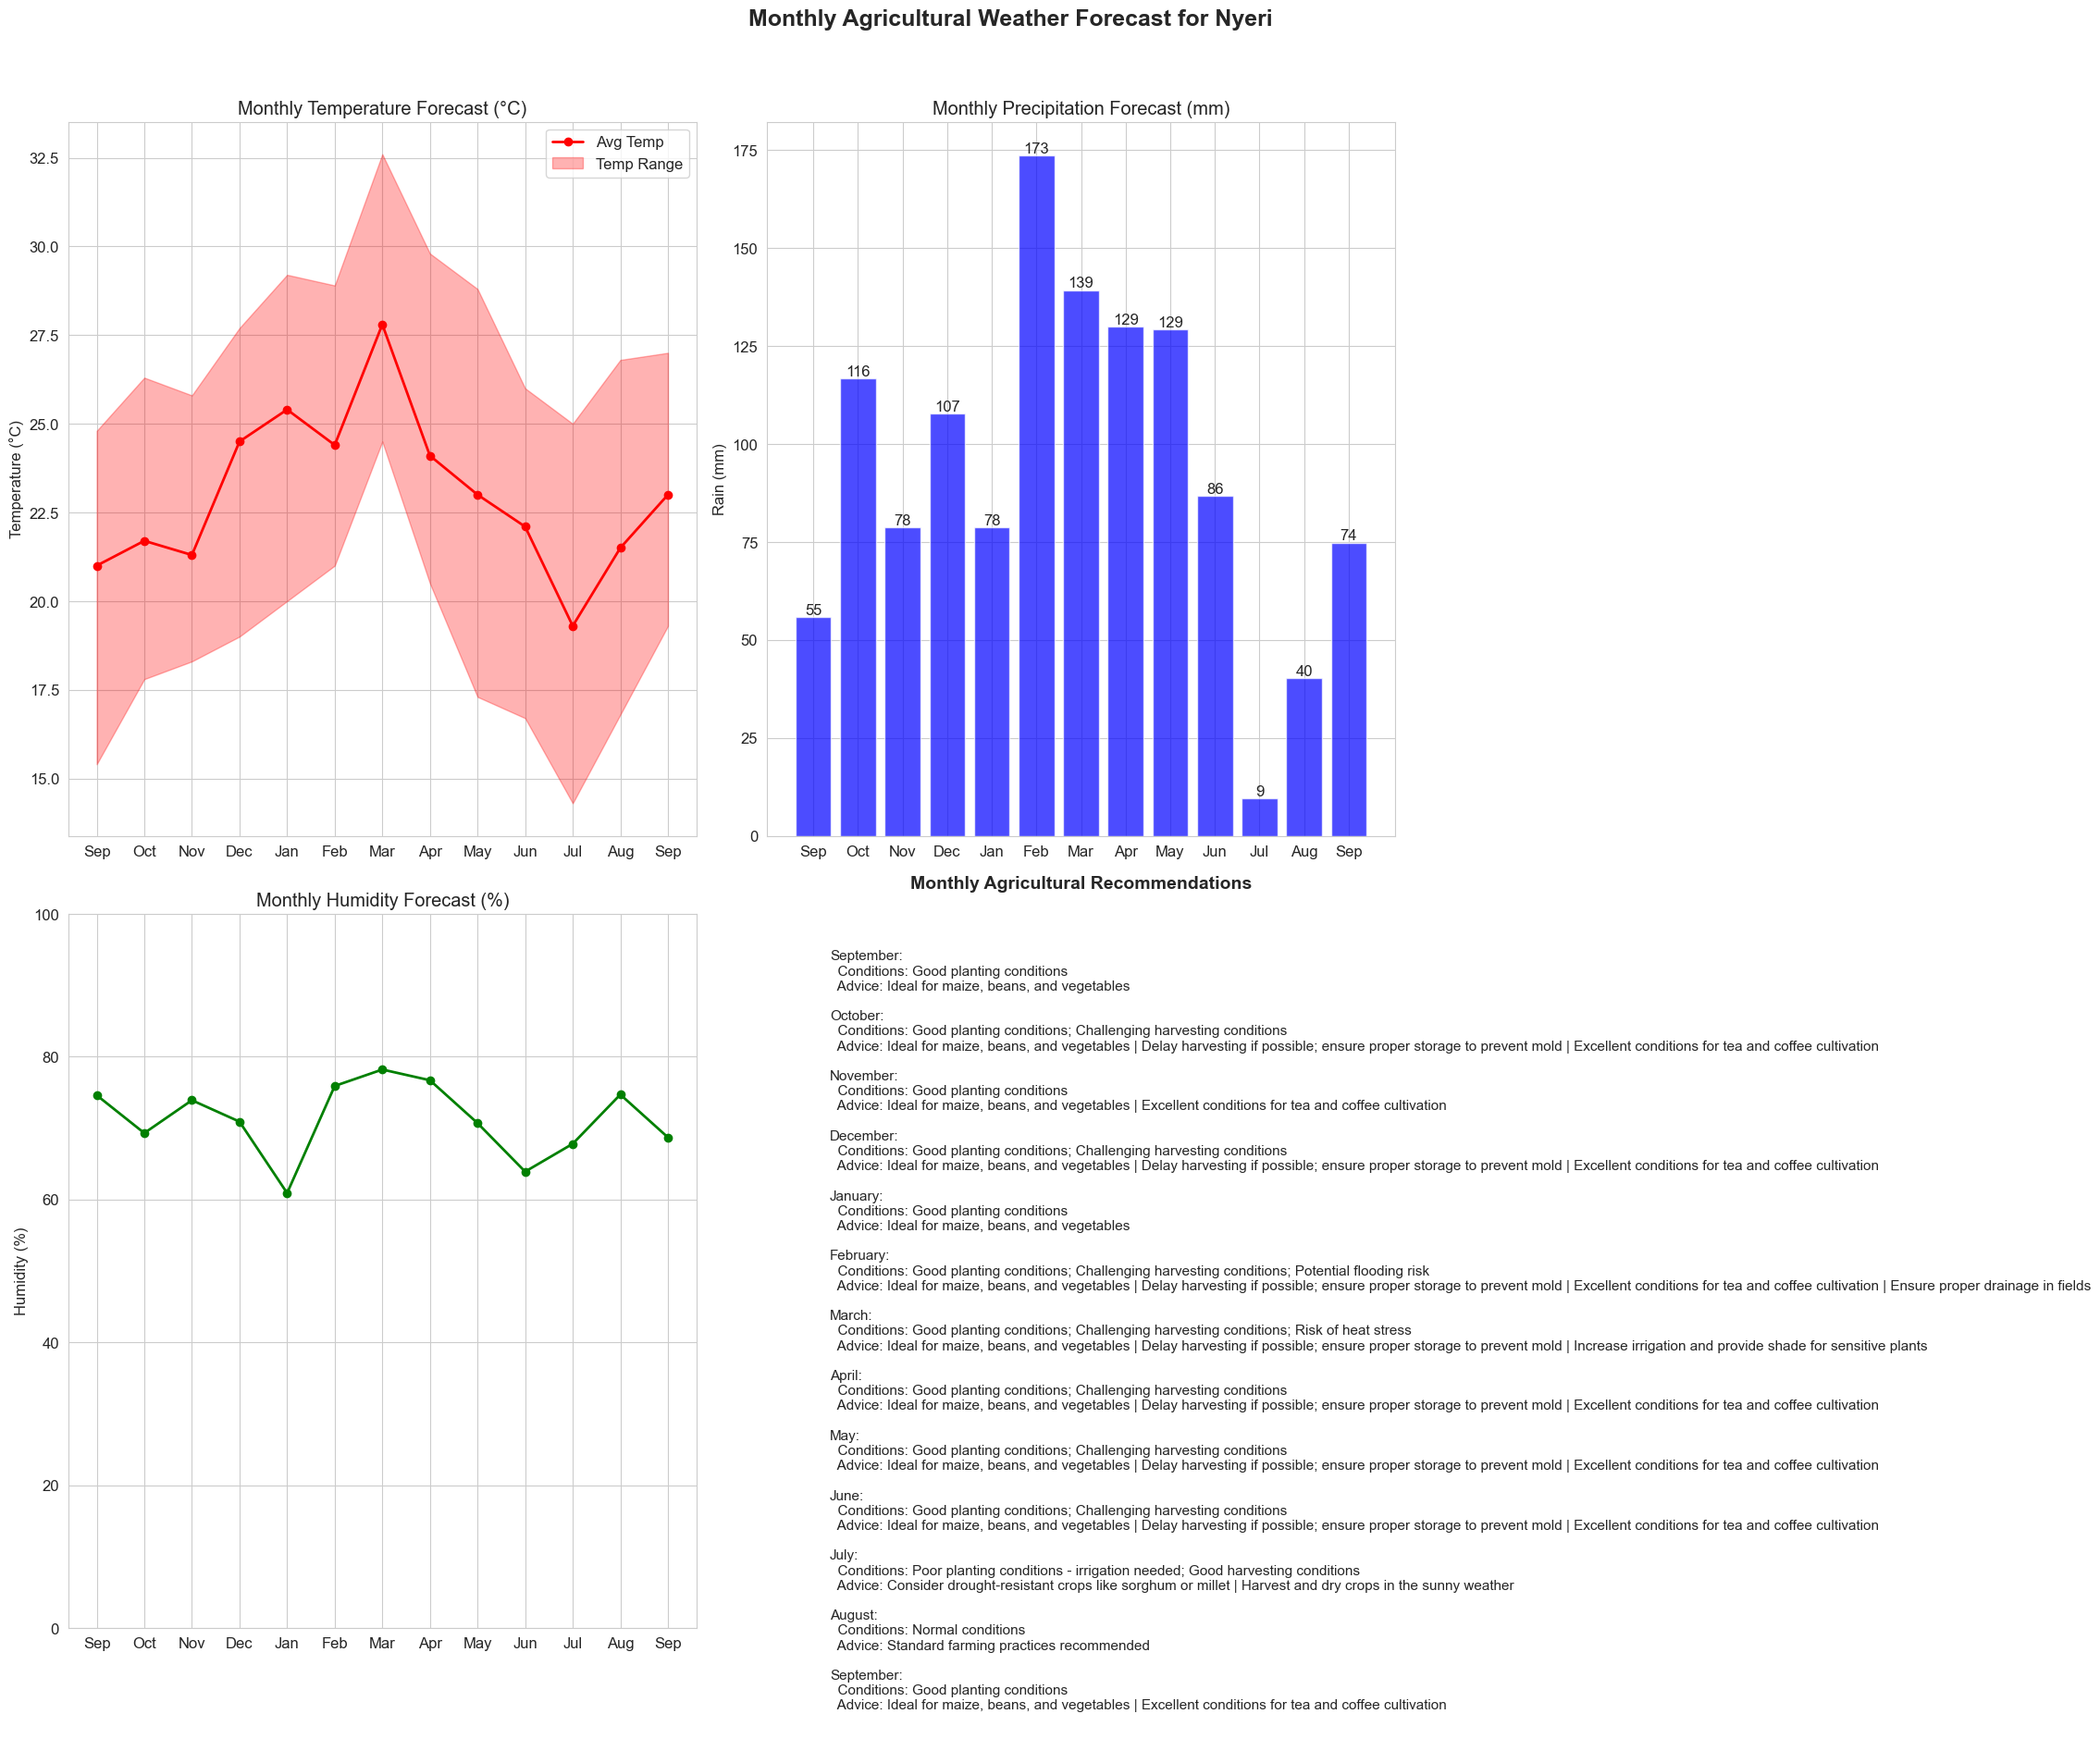


📊 Summary of Monthly Agricultural Conditions:
September:
  Temperature: 21.0°C (min 15.4°C, max 24.8°C)
  Rain: 55.8mm, Humidity: 74.6%
  Conditions: Good planting conditions
  Advice: Ideal for maize, beans, and vegetables

October:
  Temperature: 21.7°C (min 17.8°C, max 26.3°C)
  Rain: 116.8mm, Humidity: 69.3%
  Conditions: Good planting conditions; Challenging harvesting conditions
  Advice: Ideal for maize, beans, and vegetables | Delay harvesting if possible; ensure proper storage to prevent mold | Excellent conditions for tea and coffee cultivation

November:
  Temperature: 21.3°C (min 18.3°C, max 25.8°C)
  Rain: 78.7mm, Humidity: 73.9%
  Conditions: Good planting conditions
  Advice: Ideal for maize, beans, and vegetables | Excellent conditions for tea and coffee cultivation

December:
  Temperature: 24.5°C (min 19.0°C, max 27.7°C)
  Rain: 107.7mm, Humidity: 70.9%
  Conditions: Good planting conditions; Challenging harvesting conditions
  Advice: Ideal for maize, beans, and veg

In [2]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import calendar
import numpy as np
import os
%pip install python-dotenv

from dotenv import load_dotenv
from pathlib import Path

# Load environment variables from .env file
# Try to find the .env file in the current directory or parent directories
env_path = None
current_dir = Path(__file__).parent if "__file__" in locals() else Path.cwd()

# Look for .env file in current directory and parent directories
for path in [current_dir, current_dir.parent]:
    potential_env_path = path / ".env"
    if potential_env_path.exists():
        env_path = potential_env_path
        break

if env_path:
    load_dotenv(dotenv_path=env_path)
    print(f"Loading .env file from: {env_path}")
else:
    print("Warning: No .env file found. Using default API key.")

# Get API key from environment variable
API_KEY = os.getenv("OPENWEATHER_API_KEY") or os.getenv("API_KEY")

# Check if API key is available
if not API_KEY:
    print("Warning: OPENWEATHER_API_KEY not found in .env file.")
    print("Using default API key (may have limited requests).")
    API_KEY = "5c5ac99122a7842b5581921bfebb239a"  # Fallback key
else:
    print("API key loaded successfully from .env file")

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 10)
plt.rcParams['font.size'] = 12

def get_user_input():
    """Get city and country code from user input"""
    print("🌱 Monthly Agricultural Weather Advisor 🌾")
    print("=" * 50)
    
    city = input("Enter city name (e.g., Nairobi): ").strip()
    if not city:
        city = "Nairobi"  # Default value
    
    country_code = input("Enter country code (e.g., KE for Kenya, or press Enter for default): ").strip().upper()
    if not country_code:
        country_code = "KE"  # Default value
    
    return city, country_code

def get_city_coordinates(city, state_code="", country_code=""):
    """Get latitude and longitude for a city"""
    url = "http://api.openweathermap.org/geo/1.0/direct"
    params = {
        'q': f"{city},{state_code},{country_code}",
        'limit': 1,
        'appid': API_KEY
    }
    
    try:
        response = requests.get(url, params=params, timeout=10)
        if response.status_code == 200 and response.json():
            data = response.json()[0]
            print(f"Found {city}: {data['lat']}, {data['lon']}")
            return data['lat'], data['lon']
        elif response.status_code == 401:
            print("Error: Invalid API key. Please check your OPENWEATHER_API_KEY in the .env file")
            print("You can get a free API key from: https://home.openweathermap.org/api_keys")
            return None, None
        else:
            print(f"Error getting coordinates: {response.status_code}")
            print(f"Response: {response.text}")
            return None, None
    except Exception as e:
        print(f"Error: {e}")
        return None, None

def get_historical_weather(lat, lon, months=12):
    """Get historical weather data for the past months"""
    end_date = datetime.now()
    start_date = end_date - timedelta(days=30*months)
    
    # Since OpenWeatherMap doesn't have a free historical monthly API,
    # we'll simulate monthly data based on historical patterns
    # In a real application, you would use a different API or database
    
    # Create simulated monthly data based on climate patterns
    months_data = []
    current = start_date
    
    # Climate patterns for different regions
    # These are approximate values and would be better from a real climate API
    if lat > 0:  # Northern hemisphere
        base_temps = {
            1: 5, 2: 6, 3: 10, 4: 15, 5: 20, 6: 25,
            7: 28, 8: 27, 9: 23, 10: 17, 11: 11, 12: 7
        }
        base_rainfall = {
            1: 60, 2: 50, 3: 55, 4: 60, 5: 65, 6: 50,
            7: 40, 8: 45, 9: 55, 10: 70, 11: 75, 12: 65
        }
    else:  # Southern hemisphere or equatorial
        base_temps = {
            1: 25, 2: 25, 3: 24, 4: 23, 5: 22, 6: 20,
            7: 20, 8: 21, 9: 22, 10: 23, 11: 24, 12: 25
        }
        base_rainfall = {
            1: 100, 2: 120, 3: 150, 4: 180, 5: 100, 6: 60,
            7: 40, 8: 50, 9: 80, 10: 120, 11: 140, 12: 110
        }
    
    # Adjust for latitude (colder at higher latitudes, warmer near equator)
    lat_adjustment = abs(lat) / 90 * 15  # Up to 15 degrees adjustment
    if lat > 0:  # Northern hemisphere
        for month in base_temps:
            base_temps[month] -= lat_adjustment
    else:  # Southern hemisphere
        for month in base_temps:
            base_temps[month] -= lat_adjustment
    
    while current <= end_date:
        month = current.month
        year = current.year
        
        # Add some randomness to simulate actual weather variations
        temp_variation = np.random.normal(0, 1.5)
        rain_variation = max(0, np.random.normal(1, 0.3))
        
        avg_temp = base_temps[month] + temp_variation
        min_temp = avg_temp - np.random.uniform(3, 6)
        max_temp = avg_temp + np.random.uniform(3, 6)
        total_rain = base_rainfall[month] * rain_variation
        avg_humidity = np.random.uniform(60, 80)
        
        months_data.append({
            'year': year,
            'month': month,
            'month_name': calendar.month_name[month],
            'avg_temp': round(avg_temp, 1),
            'min_temp': round(min_temp, 1),
            'max_temp': round(max_temp, 1),
            'total_rain': round(total_rain, 1),
            'avg_humidity': round(avg_humidity, 1)
        })
        
        # Move to next month safely (set day to 1 to avoid ValueError)
        if current.month == 12:
            current = current.replace(year=current.year+1, month=1, day=1)
        else:
            current = current.replace(month=current.month+1, day=1)
    
    return pd.DataFrame(months_data)

def analyze_agricultural_conditions(df, city_name):
    """Analyze weather data for agricultural recommendations with more detailed advice"""
    if df is None or df.empty:
        print("No data to analyze")
        return
    
    # Agricultural recommendations for each month
    recommendations = []
    detailed_advice = []
    
    for _, row in df.iterrows():
        month_conditions = []
        month_advice = []
        
        # Planting recommendations based on temperature and rainfall
        if row['total_rain'] > 50 and row['avg_temp'] >= 18:
            month_conditions.append("Good planting conditions")
            if row['avg_temp'] >= 20:
                month_advice.append("Ideal for maize, beans, and vegetables")
            else:
                month_advice.append("Suitable for cool-season crops like wheat and barley")
        elif row['total_rain'] < 30:
            month_conditions.append("Poor planting conditions - irrigation needed")
            month_advice.append("Consider drought-resistant crops like sorghum or millet")
        
        # Harvesting recommendations
        if row['total_rain'] < 40 and row['avg_temp'] > 15:
            month_conditions.append("Good harvesting conditions")
            month_advice.append("Harvest and dry crops in the sunny weather")
        elif row['total_rain'] > 80:
            month_conditions.append("Challenging harvesting conditions")
            month_advice.append("Delay harvesting if possible; ensure proper storage to prevent mold")
        
        # Specialized crop advice
        if 20 <= row['avg_temp'] <= 25 and row['total_rain'] > 60:
            month_advice.append("Excellent conditions for tea and coffee cultivation")
        
        # Warning conditions
        if row['min_temp'] < 10:
            month_conditions.append("Risk of cold stress on crops")
            month_advice.append("Protect sensitive crops with covers or mulch")
        if row['max_temp'] > 30:
            month_conditions.append("Risk of heat stress")
            month_advice.append("Increase irrigation and provide shade for sensitive plants")
        if row['total_rain'] > 150:
            month_conditions.append("Potential flooding risk")
            month_advice.append("Ensure proper drainage in fields")
        
        recommendations.append("; ".join(month_conditions) if month_conditions else "Normal conditions")
        detailed_advice.append(" | ".join(month_advice) if month_advice else "Standard farming practices recommended")
    
    df['recommendation'] = recommendations
    df['detailed_advice'] = detailed_advice
    
    return df

def create_visualization(df, city_name):
    """Create visualization of monthly weather data and recommendations"""
    if df is None or df.empty:
        print("No data to visualize")
        return
    
    fig = plt.figure(figsize=(22, 20))
    
    # Temperature plot
    ax1 = plt.subplot(2, 2, 1)
    months = [f"{m[:3]}" for m in df['month_name']]
    x_pos = np.arange(len(months))
    
    ax1.plot(x_pos, df['avg_temp'], 'o-', color='red', label='Avg Temp', linewidth=2)
    ax1.fill_between(x_pos, df['min_temp'], df['max_temp'], alpha=0.3, color='red', label='Temp Range')
    ax1.set_title('Monthly Temperature Forecast (°C)')
    ax1.set_ylabel('Temperature (°C)')
    ax1.set_xticks(x_pos)
    ax1.set_xticklabels(months)
    ax1.legend()
    
    # Precipitation plot
    ax2 = plt.subplot(2, 2, 2)
    bars = ax2.bar(x_pos, df['total_rain'], color='blue', alpha=0.7)
    ax2.set_title('Monthly Precipitation Forecast (mm)')
    ax2.set_ylabel('Rain (mm)')
    ax2.set_xticks(x_pos)
    ax2.set_xticklabels(months)
    
    # Add value labels on bars
    for bar in bars:
        height = bar.get_height()
        ax2.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom')
    
    # Humidity plot
    ax3 = plt.subplot(2, 2, 3)
    ax3.plot(x_pos, df['avg_humidity'], 'o-', color='green', linewidth=2)
    ax3.set_title('Monthly Humidity Forecast (%)')
    ax3.set_ylabel('Humidity (%)')
    ax3.set_xticks(x_pos)
    ax3.set_xticklabels(months)
    ax3.set_ylim(0, 100)
    
    # Recommendations text
    ax4 = plt.subplot(2, 2, 4)
    ax4.axis('off')
    ax4.set_title('Monthly Agricultural Recommendations', fontweight='bold', pad=20, fontsize=14)
    
    recommendation_text = ""
    for _, row in df.iterrows():
        recommendation_text += f"{row['month_name']}:\n"
        recommendation_text += f"  Conditions: {row['recommendation']}\n"
        recommendation_text += f"  Advice: {row['detailed_advice']}\n\n"
    
    ax4.text(0.1, 0.95, recommendation_text, fontfamily='sans-serif', 
             verticalalignment='top', transform=ax4.transAxes, fontsize=11)
    
    plt.suptitle(f'Monthly Agricultural Weather Forecast for {city_name}', fontsize=18, fontweight='bold')
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()
    
    return fig

def main():
    """Main function to run the agricultural advisor"""
    
    # Get user input for city and country
    CITY, COUNTRY_CODE = get_user_input()
    
    # Get coordinates
    print(f"\nGetting coordinates for {CITY}, {COUNTRY_CODE}...")
    latitude, longitude = get_city_coordinates(CITY, "", COUNTRY_CODE)
    if latitude is None or longitude is None:
        print("Could not get coordinates. Please check your API key and city name.")
        return
    
    # Get historical/typical monthly data
    print("Getting monthly weather patterns...")
    weather_data = get_historical_weather(latitude, longitude, 12)
    if weather_data is None:
        print("Could not get weather data.")
        return
    
    # Analyze for agriculture
    monthly_analysis = analyze_agricultural_conditions(weather_data, CITY)
    
    # Create visualization
    fig = create_visualization(monthly_analysis, CITY)
    
    # Print summary
    print("\n📊 Summary of Monthly Agricultural Conditions:")
    print("=" * 60)
    for _, row in monthly_analysis.iterrows():
        print(f"{row['month_name']}:")
        print(f"  Temperature: {row['avg_temp']}°C (min {row['min_temp']}°C, max {row['max_temp']}°C)")
        print(f"  Rain: {row['total_rain']}mm, Humidity: {row['avg_humidity']}%")
        print(f"  Conditions: {row['recommendation']}")
        print(f"  Advice: {row['detailed_advice']}")
        print()

# Run the main function
if __name__ == "__main__":
    main()